### Linear Regression on House price data set

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### 1. Loading the data

In [2]:
df = pd.read_csv('HousePrices.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


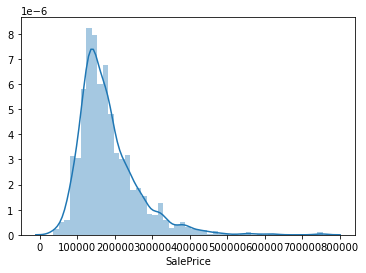

In [4]:
sns.distplot(df['SalePrice'])


In [5]:
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
dropList= ['PoolQC','Alley','MiscFeature','Id'] #dropping these features as they have very less non null values
df.drop(dropList,axis=1,inplace=True)

In [8]:
corr = df.corr()
corr.sort_values(["SalePrice"], ascending = False, inplace = True)
df2= pd.DataFrame(corr.SalePrice)
df2

,SalePrice
SalePrice,1.000000
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
FullBath,0.560664
TotRmsAbvGrd,0.533723
YearBuilt,0.522897


#### 2. Data preprocessing

In [9]:
objList = df.select_dtypes(include = "object").columns
print (objList)

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'Fence', 'SaleType', 'SaleCondition'],
      dtype='object')


In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for feature in objList:
    df[feature] = le.fit_transform(df[feature].astype(str))

print (df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   int32  
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   int32  
 5   LotShape       1460 non-null   int32  
 6   LandContour    1460 non-null   int32  
 7   Utilities      1460 non-null   int32  
 8   LotConfig      1460 non-null   int32  
 9   LandSlope      1460 non-null   int32  
 10  Neighborhood   1460 non-null   int32  
 11  Condition1     1460 non-null   int32  
 12  Condition2     1460 non-null   int32  
 13  BldgType       1460 non-null   int32  
 14  HouseStyle     1460 non-null   int32  
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [11]:
df['GarageYrBlt'].fillna(df['GarageYrBlt'].median(), inplace=True)
df['MasVnrArea'].fillna(df['MasVnrArea'].median(), inplace=True)
df['LotFrontage'].fillna(df['LotFrontage'].median(), inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   int32  
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   int32  
 5   LotShape       1460 non-null   int32  
 6   LandContour    1460 non-null   int32  
 7   Utilities      1460 non-null   int32  
 8   LotConfig      1460 non-null   int32  
 9   LandSlope      1460 non-null   int32  
 10  Neighborhood   1460 non-null   int32  
 11  Condition1     1460 non-null   int32  
 12  Condition2     1460 non-null   int32  
 13  BldgType       1460 non-null   int32  
 14  HouseStyle     1460 non-null   int32  
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [12]:
X= df.drop('SalePrice',axis=1)
Y = df.loc[:,['SalePrice']].values
Y.shape

(1460, 1)

#### Normalization

In [13]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
X.shape

(1460, 76)

In [14]:
Y = Y.reshape(-1)
Y.shape

(1460,)

#### Test Train split

In [15]:
#test train split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.30,random_state=0)

####  Linear Regression

In [16]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression() #training the model
reg = lr.fit(X_train, y_train)

In [17]:
y_pred = reg.predict(X_test)


In [18]:
from sklearn.metrics import mean_squared_error, r2_score
print('Mean squared error: %.2f'
      % mean_squared_error(y_test,y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))
R2= r2_score(y_test, y_pred)

Mean squared error: 2171306692.38
Coefficient of determination: 0.68


In [19]:
prediction_output = pd.DataFrame(data = [y_test,y_pred],index = ['y_test','y_predict'])
prediction_output.transpose()

,y_test,y_predict
0,200624.0,221366.8149
1,133000.0,175434.8149
2,110000.0,101291.5649
3,192000.0,218629.8149
4,88000.0,93295.0649
...,...,...
433,241500.0,211818.8149
434,127500.0,167598.3149
435,350000.0,336422.8149
436,227000.0,216404.8149


### Using Ridge Regression

In [34]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold

cv = RepeatedKFold(n_splits=20, n_repeats=5, random_state=1)
# define grid
grid = dict()
grid['alpha'] = np.arange(0, 1, 0.1)

ridge=Ridge()
#parameters={'alpha':[1.0]}
ridge_regressor=GridSearchCV(ridge,grid,scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
ridge_regressor.fit(X, Y)

GridSearchCV(cv=RepeatedKFold(n_repeats=10, n_splits=20, random_state=1),
             estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])},
             scoring='neg_mean_absolute_error')

#### Lasso Regression

In [35]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
lasso=Lasso()
#parameters={'alpha':[1.0]}
cv = RepeatedKFold(n_splits=20, n_repeats=5, random_state=1)
grid = dict()
grid['alpha'] = np.arange(0, 1, 0.1)
lasso_regressor=GridSearchCV(lasso,grid,scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

lasso_regressor.fit(X, Y)

GridSearchCV(cv=RepeatedKFold(n_repeats=10, n_splits=20, random_state=1),
             estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])},
             scoring='neg_mean_absolute_error')

In [36]:
prediction_lasso=lasso_regressor.predict(X_test)
prediction_ridge=ridge_regressor.predict(X_test)

#### Accuracy Ridge

In [37]:
from sklearn.metrics import mean_squared_error, r2_score
print('Mean squared error: %.2f'
      % mean_squared_error(y_test,prediction_ridge))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, prediction_ridge))
R2= r2_score(y_test, prediction_ridge)

Mean squared error: 1325269347.07
Coefficient of determination: 0.80


In [38]:
prediction_output = pd.DataFrame(data = [y_test, prediction_ridge],index = ['y_test','y_predict'])
prediction_output.transpose()

,y_test,y_predict
0,200624.0,214783.371418
1,133000.0,174938.558921
2,110000.0,105779.883545
3,192000.0,210048.826330
4,88000.0,91622.969459
...,...,...
433,241500.0,219824.763741
434,127500.0,166153.491696
435,350000.0,319413.140603
436,227000.0,213744.492609


#### Accuracy Lasso

In [39]:
from sklearn.metrics import mean_squared_error, r2_score
print('Mean squared error: %.2f'
      % mean_squared_error(y_test,prediction_lasso))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, prediction_lasso))
R2= r2_score(y_test, prediction_lasso)

Mean squared error: 1325095818.28
Coefficient of determination: 0.80


In [40]:
prediction_output = pd.DataFrame(data = [y_test, prediction_lasso],index = ['y_test','y_predict'])
prediction_output.transpose()

,y_test,y_predict
0,200624.0,214758.438533
1,133000.0,174992.142383
2,110000.0,105776.009426
3,192000.0,210038.867178
4,88000.0,91616.436591
...,...,...
433,241500.0,219837.828619
434,127500.0,166182.611763
435,350000.0,319414.773506
436,227000.0,213761.239953
